Using tensorflow to classify MNIST handwritten digits. Then comparing against perceptron accuracy

In [1]:
!pip install tensorflow


  Using cached tensorflow-2.10.0-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.7.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.9.24-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached grpcio-1.49.1-cp310-cp310-win_amd64.whl (3.6 MB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.

In [4]:
from tensorflow import keras

In [11]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [12]:
x_train.shape

(60000, 28, 28)

3

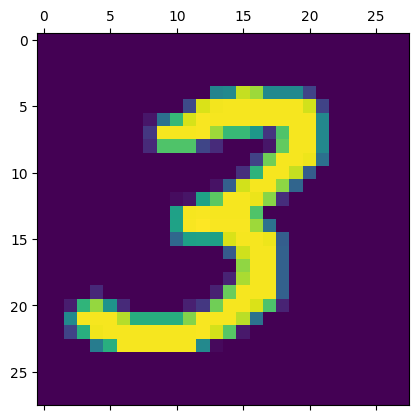

In [13]:
import matplotlib.pyplot as plt

i=135
plt.matshow(x_train[i])
y_train[i]

In [19]:
#!pip install sklearn
from sklearn.linear_model import Perceptron

x_trainf = x_train.reshape(x_train.shape[0], -1)
x_testf = x_test.reshape(x_test.shape[0], -1)

p = Perceptron()

p.fit(x_trainf,y_train)
print(f"Training data score: {p.score(x_trainf,y_train)}")
print(f"Test data score: {p.score(x_testf,y_test)}")

Training data score: 0.8853833333333333
Test data score: 0.8805


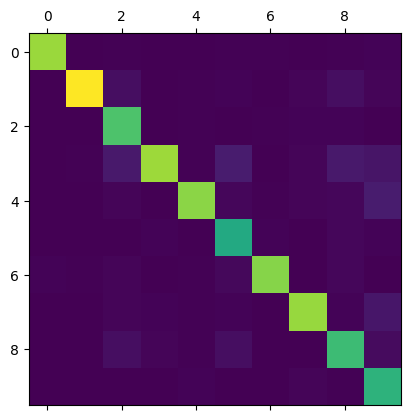

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(p.predict(x_testf), y_test)
plt.matshow(cm)

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    #output layer
    keras.layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='adam',
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']

)
model.fit(x_trainf,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2279 - accuracy: 0.9338
Epoch 2/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.0941 - accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.0667 - accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.0507 - accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.0383 - accuracy: 0.9877


In [31]:
model.evaluate(x_testf,y_test,verbose=2)

313/313 - 0s - loss: 0.0710 - accuracy: 0.9797 - 224ms/epoch - 716us/step


[0.07104635238647461, 0.9797000288963318]

313/313 [==============================] - 0s 675us/step


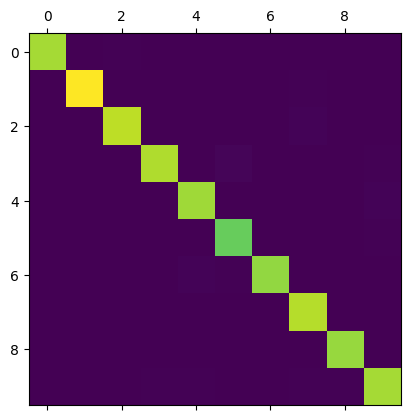

In [32]:
cm = confusion_matrix(model.predict(x_testf).argmax(1),y_test)
plt.matshow(cm)